# Comparison of Batch, Mini-Batch and Stochastic Gradient Descent

This notebook displays an animation comparing Batch, Mini-Batch and Stochastic Gradient Descent (introduced in Chapter 4). Thanks to [Daniel Ingram](https://github.com/daniel-s-ingram) who contributed this notebook.

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/extra_gradient_descent_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/extra_gradient_descent_comparison.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

matplotlib.rc('animation', html='jshtml')

In [2]:
import numpy as np

m = 100
X = 2 * np.random.rand(m, 1)
X_b = np.c_[np.ones((m, 1)), X]
y = 4 + 3 * X + np.random.rand(m, 1)

In [3]:
def batch_gradient_descent():
    n_iterations = 1000
    learning_rate = 0.05
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    for i in range(n_iterations):
        gradients = 2 * X_b.T @ (X_b @ thetas - y) / m
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)

    return thetas_path

In [4]:
def stochastic_gradient_descent():
    n_epochs = 50
    t0, t1 = 5, 50
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T @ (xi @ thetas - yi)
            eta = learning_schedule(epoch * m + i, t0, t1)
            thetas = thetas - eta * gradients
            thetas_path.append(thetas)

    return thetas_path

In [5]:
def mini_batch_gradient_descent():
    n_iterations = 50
    minibatch_size = 20
    t0, t1 = 200, 1000
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    t = 0
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size):
            t += 1
            xi = X_b_shuffled[i : i + minibatch_size]
            yi = y_shuffled[i : i + minibatch_size]
            gradients = 2 * xi.T @ (xi @ thetas - yi) / minibatch_size
            eta = learning_schedule(t, t0, t1)
            thetas = thetas - eta * gradients
            thetas_path.append(thetas)

    return thetas_path

In [6]:
def compute_mse(theta):
    return ((X_b @ theta - y) ** 2).sum() / m

In [7]:
def learning_schedule(t, t0, t1):
    return t0 / (t + t1)

In [8]:
theta0, theta1 = np.meshgrid(np.arange(0, 5, 0.1), np.arange(0, 5, 0.1))
r, c = theta0.shape
cost_map = np.array([[0 for _ in range(c)] for _ in range(r)])
for i in range(r):
    for j in range(c):
        theta = np.array([theta0[i,j], theta1[i,j]])
        cost_map[i,j] = compute_mse(theta)

In [9]:
exact_solution = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
bgd_thetas = np.array(batch_gradient_descent())
sgd_thetas = np.array(stochastic_gradient_descent())
mbgd_thetas = np.array(mini_batch_gradient_descent())

In [10]:
bgd_len = len(bgd_thetas)
sgd_len = len(sgd_thetas)
mbgd_len = len(mbgd_thetas)
n_iter = min(bgd_len, sgd_len, mbgd_len)

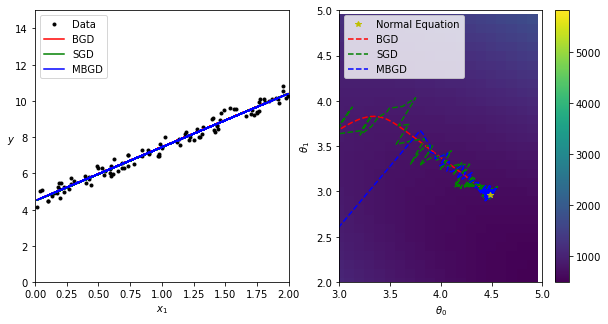

In [11]:
fig = plt.figure(figsize=(10, 5))
data_ax = fig.add_subplot(121)
cost_ax = fig.add_subplot(122)

data_ax.plot(X, y, 'k.')

cost_ax.plot(exact_solution[0,0], exact_solution[1,0], 'y*')
cost_ax.pcolor(theta0, theta1, cost_map, shading='auto')

i = -1
[bgd_data_plot] = data_ax.plot(X, X_b @ bgd_thetas[i,:], 'r-')
[bgd_cost_plot] = cost_ax.plot(bgd_thetas[:i,0], bgd_thetas[:i,1], 'r--')

[sgd_data_plot] = data_ax.plot(X, X_b @ sgd_thetas[i,:], 'g-')
[sgd_cost_plot] = cost_ax.plot(sgd_thetas[:i,0], sgd_thetas[:i,1], 'g--')

[mbgd_data_plot] = data_ax.plot(X, X_b @ mbgd_thetas[i,:], 'b-')
[mbgd_cost_plot] = cost_ax.plot(mbgd_thetas[:i,0], mbgd_thetas[:i,1], 'b--')

data_ax.set_xlim([0, 2])
data_ax.set_ylim([0, 15])
cost_ax.set_xlim([3, 5])
cost_ax.set_ylim([2, 5])

data_ax.set_xlabel(r'$x_1$')
data_ax.set_ylabel(r'$y$', rotation=0)
cost_ax.set_xlabel(r'$\theta_0$')
cost_ax.set_ylabel(r'$\theta_1$')

data_ax.legend(('Data', 'BGD', 'SGD', 'MBGD'), loc="upper left")
cost_ax.legend(('Normal Equation', 'BGD', 'SGD', 'MBGD'), loc="upper left")

cost_ax.plot(exact_solution[0,0], exact_solution[1,0], 'y*')
cost_img = cost_ax.pcolor(theta0, theta1, cost_map, shading='auto')
fig.colorbar(cost_img)
plt.show()

In [12]:
def animate(i):
    bgd_data_plot.set_data(X, X_b @ bgd_thetas[i,:])
    bgd_cost_plot.set_data(bgd_thetas[:i,0], bgd_thetas[:i,1])

    sgd_data_plot.set_data(X, X_b @ sgd_thetas[i,:])
    sgd_cost_plot.set_data(sgd_thetas[:i,0], sgd_thetas[:i,1])

    mbgd_data_plot.set_data(X, X_b @ mbgd_thetas[i,:])
    mbgd_cost_plot.set_data(mbgd_thetas[:i,0], mbgd_thetas[:i,1])

In [13]:
FuncAnimation(fig, animate, frames=n_iter // 3)